# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.decomposition import PCA  
import numpy as np  
from sklearn.metrics import silhouette_score  
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering 


# **PREPARING THE DATA**

In [ ]:

data = pd.read_csv('datasets/K-means_AC_data.csv')

data.head(20)

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0
5,Goa,0.0,67933.0,0.0,0.0,12641.0,0.0,0.0,0.0,27076.0,0.0,0.0,4662.0,173.0,33134.0,0.0,145619.0
6,Gujarat,0.0,512530.0,356734.0,409597.0,32389.0,36753.0,8934.0,14457.0,97287.0,54376.0,0.0,906194.0,0.0,0.0,0.0,2429251.0
7,Haryana,857033.0,294031.0,183115.0,18099.0,14726.0,21893.0,13349.0,12253.0,93349.0,3081.0,0.0,251886.0,93349.0,3076.0,0.0,1859240.0
8,Himachal Pradesh,9.0,92700.0,65258.0,3410.0,6428.0,2982.0,874.0,0.0,26451.0,12485.0,0.0,55521.0,4214.0,0.0,0.0,270332.0
9,Jammu and Kashmir,498.0,70813.0,51754.0,48890.0,18630.0,6107.0,5807.0,930.0,13179.0,35132.0,11833.0,27568.0,2768.0,390.0,0.0,294299.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   States/Union Territories                                      37 non-null     object 
 1   Multiaxled/Articulated Vehicles (I)                           36 non-null     float64
 2   Trucks and Lorries (II)                                       36 non-null     float64
 3   Light Motor Vehicles (Goods) (II) - Four Wheelers             36 non-null     float64
 4   Light Motor Vehicles (Goods) (II) - Three Wheelers            36 non-null     float64
 5   Buses (IV) - Stage carriages                                  36 non-null     float64
 6   Buses (IV) - Contract carriages                               35 non-null     float64
 7   Buses (IV) - Private service vehicles                         35 non-null

In [ ]:
data.isnull().sum()

States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             1
Trucks and Lorries (II)                                         1
Light Motor Vehicles (Goods) (II) - Four Wheelers               1
Light Motor Vehicles (Goods) (II) - Three Wheelers              1
Buses (IV) - Stage carriages                                    1
Buses (IV) - Contract carriages                                 2
Buses (IV) - Private service vehicles                           2
Buses (IV) - Other buses                                        2
Taxis (V) - Motor cabs                                          1
Taxis (V) - Maxi cabs                                           2
Taxis (V) - Other taxis                                         2
Light Motor Vehicles (Passengers) (VI) - Three seaters          1
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    1
Motor cycles on hire (VII)                                      1
Other vehi

<Axes: >

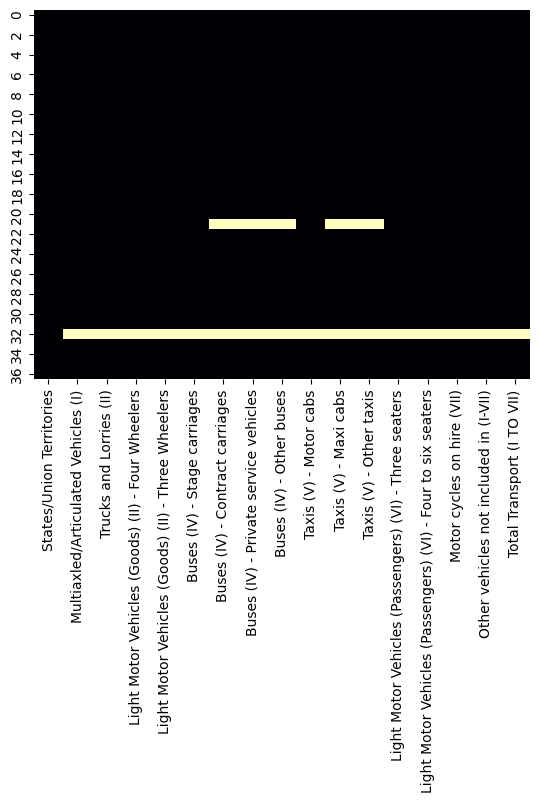

In [ ]:
# Plot heatmap to visualize missing values in the DataFrame
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

In [ ]:
data.fillna(data.median(), inplace=True)

<ipython-input-6-5737b58e2520>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
data.describe()


,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
count,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,3.700000e+01
mean,8.828915e+04,3.182875e+05,2.553296e+05,1.154135e+05,53597.162162,18401.891892,7237.729730,14429.297297,1.289512e+05,50837.405405,8544.594595,3.258443e+05,1.186812e+05,2939.027027,23511.405405,1.536423e+06
std,2.974821e+05,9.485889e+05,7.724976e+05,3.567490e+05,164052.402068,57177.009590,22824.458897,46066.893675,3.855536e+05,159824.860337,27426.112115,9.936433e+05,3.862708e+05,10368.402273,90108.528566,4.585586e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.500000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.594000e+03
25%,2.000000e+00,1.135300e+04,1.049200e+04,7.400000e+01,2142.000000,0.000000,0.000000,0.000000,8.996000e+03,519.000000,0.000000,6.425000e+03,0.000000e+00,0.000000,0.000000,8.397700e+04
50%,1.510500e+03,1.236970e+05,5.249100e+04,6.611500e+03,15771.000000,1323.000000,144.000000,47.000000,4.320000e+04,3619.000000,28.000000,4.064650e+04,8.195000e+02,0.000000,0.000000,5.218180e+05
75%,3.809900e+04,2.515700e+05,1.867300e+05,9.402500e+04,33249.000000,8534.000000,2895.000000,4472.000000,1.079560e+05,29640.000000,1770.000000,2.518860e+05,1.168300e+04,313.000000,0.000000,1.357303e+06
max,1.632594e+06,5.826471e+06,4.697352e+06,2.131844e+06,983662.000000,339112.000000,133754.000000,266895.000000,2.363997e+06,936873.000000,158047.000000,6.007797e+06,2.195193e+06,54372.000000,434961.000000,2.816292e+07


<ipython-input-8-b5e05c027564>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=4)


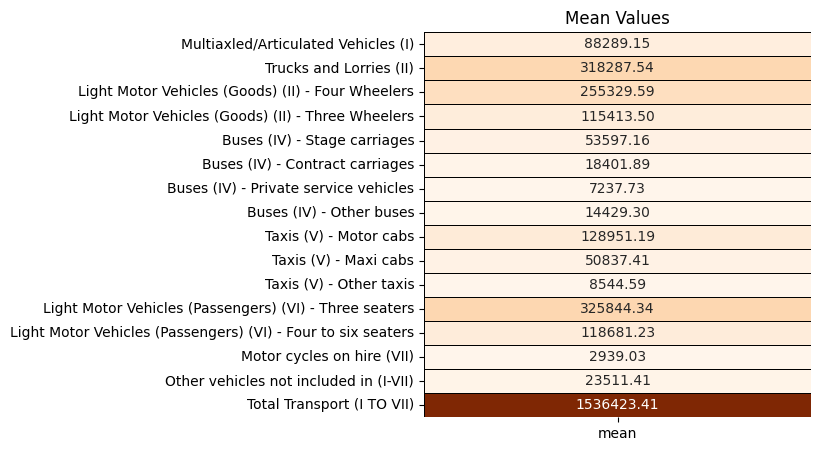

In [ ]:
# Define colors for the heatmap
colors = ['#FF781F', '#2D2926']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(data.describe().T[['mean']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)
plt.title('Mean Values')
fig.tight_layout(pad=4)

# **Exploratory Data Analysis**

In [ ]:
col = list(data.columns) 
col.remove('States/Union Territories') #not required 

categorical_features = ['States/Union Territories'] #categorical features

numerical_features = col #numerical features

print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)

Categorical Features: States/Union Territories
Numerical Features: Multiaxled/Articulated Vehicles (I) Trucks and Lorries (II) Light Motor Vehicles (Goods) (II) - Four Wheelers Light Motor Vehicles (Goods) (II) - Three Wheelers Buses (IV) - Stage carriages Buses (IV) - Contract carriages Buses (IV) - Private service vehicles Buses (IV) - Other buses Taxis (V) - Motor cabs Taxis (V) - Maxi cabs Taxis (V) - Other taxis Light Motor Vehicles (Passengers) (VI) - Three seaters Light Motor Vehicles (Passengers) (VI) - Four to six seaters Motor cycles on hire (VII) Other vehicles not included in (I-VII) Total Transport (I TO VII)


DISTIBUTION OF FEATURES

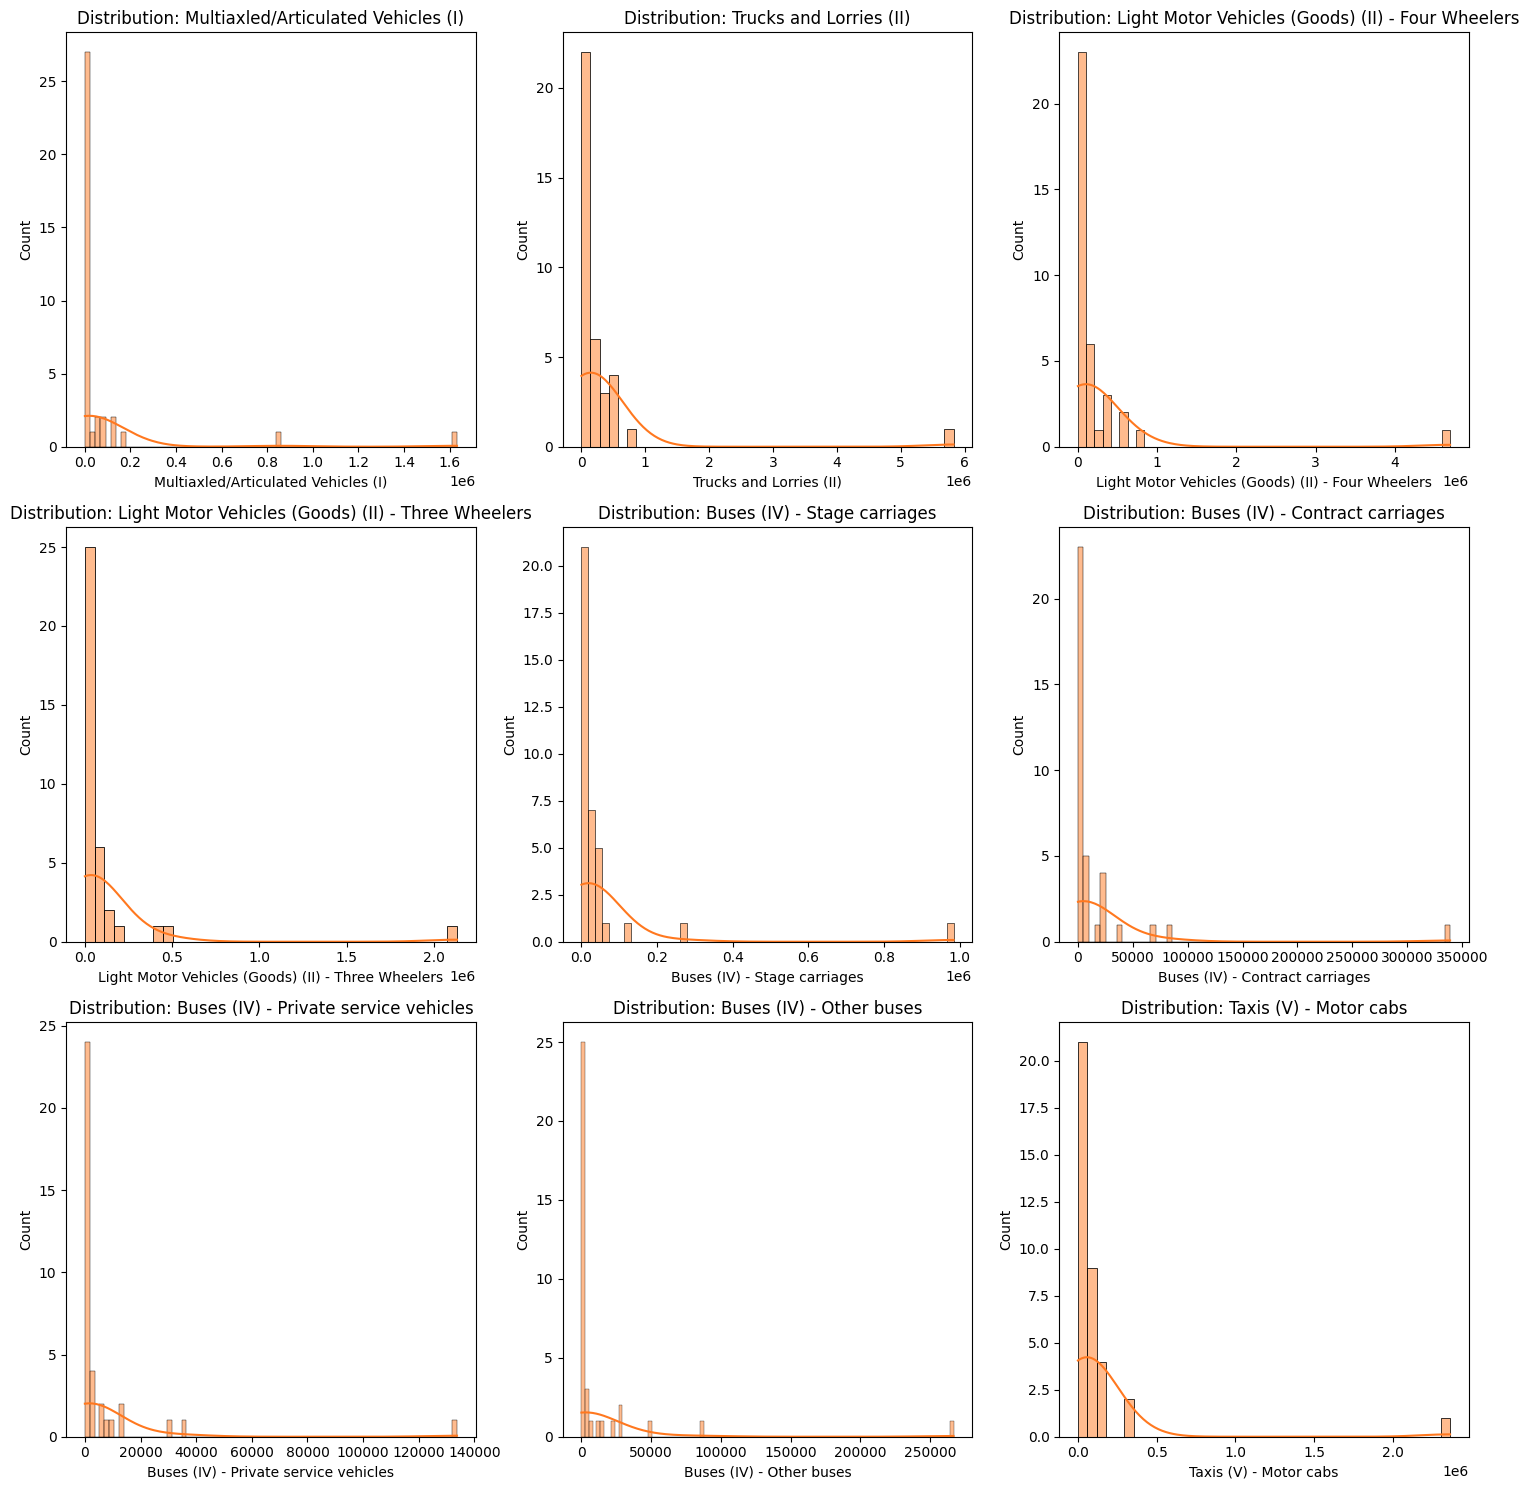

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through the first 9 numerical features
for i, feature in enumerate(numerical_features[:9]):
    row = i // 3  
    col = i % 3 
    sns.histplot(data=data, x=feature, color=colors[0], kde=True, ax=ax[row, col])
    title = 'Distribution: ' + feature
    ax[row, col].set_title(title)

plt.tight_layout()
plt.show()


Numerical features:

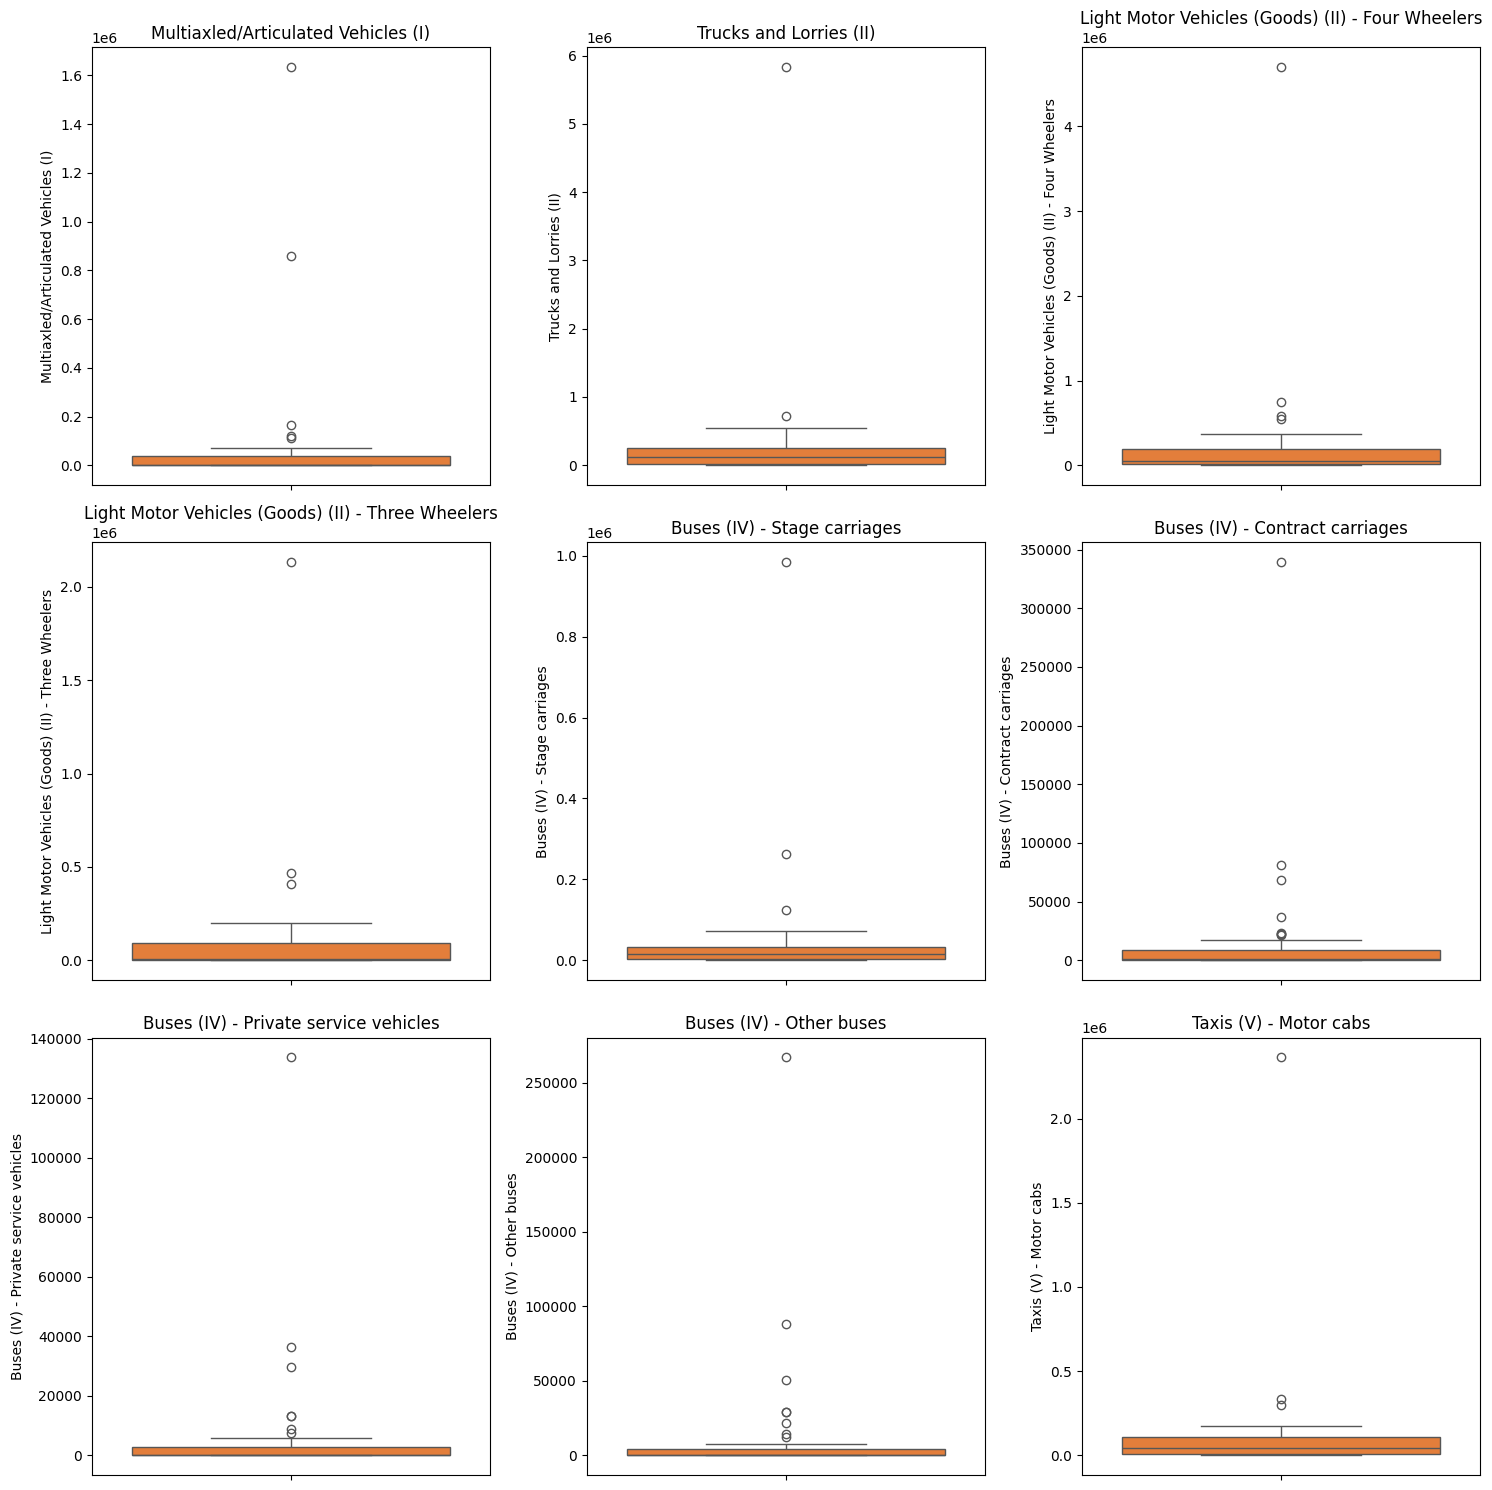

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through the first 9 numerical features
for i, feature in enumerate(numerical_features[:9]):
    row = i // 3  
    col = i % 3   
    sns.boxplot(data=data[feature], color=colors[0], ax=ax[row, col])
    ax[row, col].set_title(feature)

plt.tight_layout()
plt.show()

# **FEATURE SELECTION**

Correlation Matrix

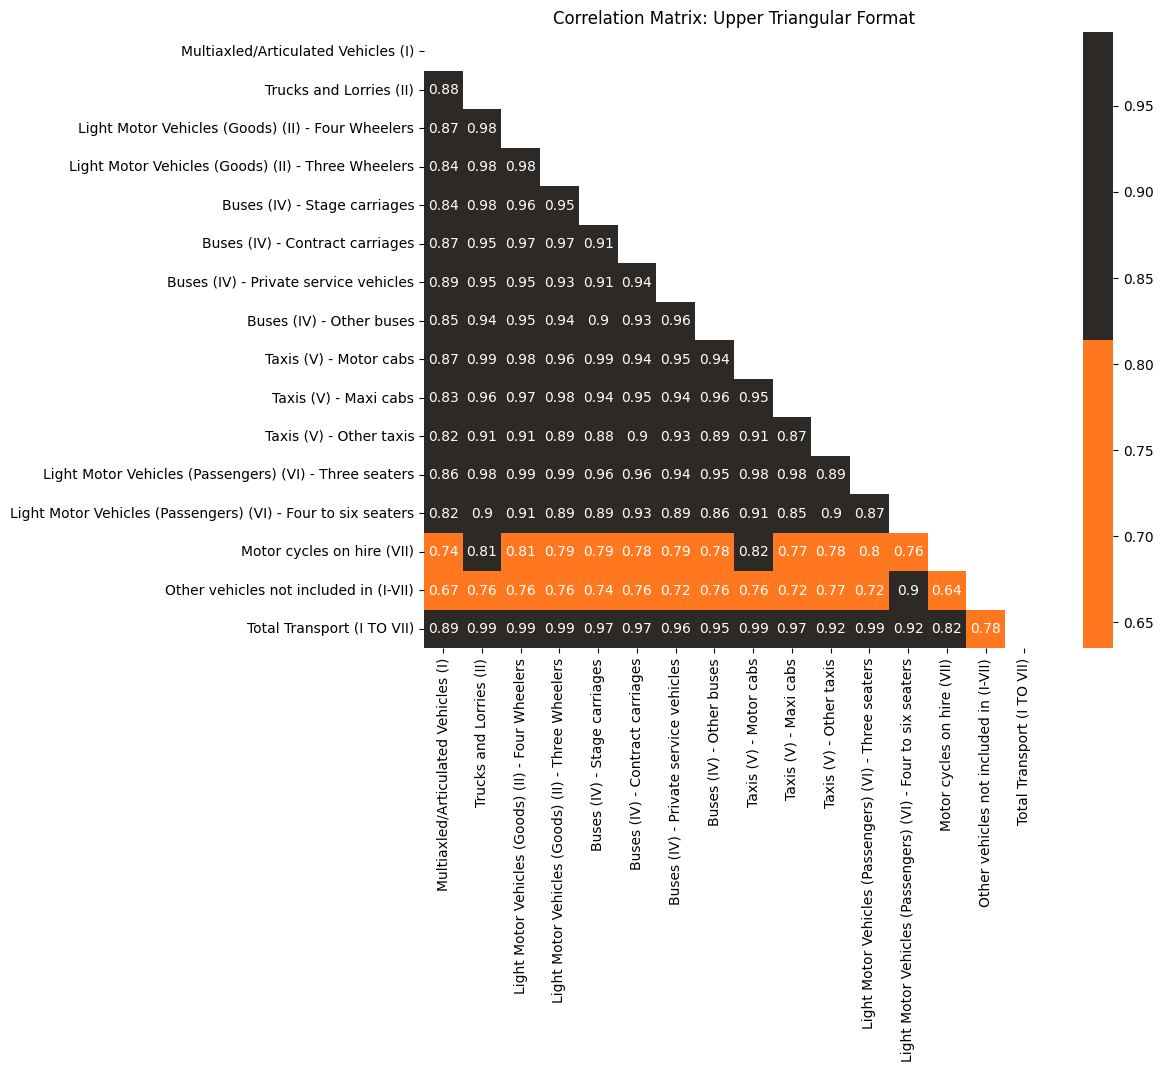

In [ ]:
ut = np.triu(data.corr(numeric_only=True))
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), cmap=colors, annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix: Upper Triangular Format')
plt.show()

Let us have 4 categories from our data:

1. Light Motors: Light Motor Vehicles (Goods) (II) - Four Wheelers, Light Motor Vehicles (Goods) (II) - Three Wheelers, Light Motor Vehicles (Passengers) (VI) - Three seaters, Light Motor Vehicles (Passengers) (VI) - Four to six seaters.
2. Buses: Buses (IV) - Stage carriages, Buses (IV) - Contract carriages, Buses (IV) - Private service vehicles, Buses (IV) - Other buses.
3. Taxis: Taxis (V) - Motor cabs, Taxis (V) - Maxi cabs ,Taxis (V) - Other taxis
4. Other vehicles: Multiaxled/Articulated Vehicles (I), Trucks and Lorries (II), Motor cycles on hire (VII), Other vehicles not included in (I-VII)

In [ ]:
feature_data = pd.DataFrame()
feature_data['Light Motors'] = (data['Light Motor Vehicles (Goods) (II) - Four Wheelers'] / data['Light Motor Vehicles (Goods) (II) - Four Wheelers'].mean()) + (data['Light Motor Vehicles (Goods) (II) - Three Wheelers'] / data['Light Motor Vehicles (Goods) (II) - Three Wheelers'].mean()) + (data['Light Motor Vehicles (Passengers) (VI) - Three seaters'] / data['Light Motor Vehicles (Passengers) (VI) - Three seaters'].mean()) + (data['Light Motor Vehicles (Passengers) (VI) - Four to six seaters'] / data['Light Motor Vehicles (Passengers) (VI) - Four to six seaters'].mean())

In [ ]:
feature_data['Buses'] = (data['Buses (IV) - Stage carriages'] / data['Buses (IV) - Stage carriages'].mean()) + (data['Buses (IV) - Contract carriages'] / data['Buses (IV) - Contract carriages'].mean()) + (data['Buses (IV) - Private service vehicles'] / data['Buses (IV) - Private service vehicles'].mean()) + (data['Buses (IV) - Other buses'] / data['Buses (IV) - Other buses'].mean())

In [ ]:
feature_data['Taxis'] = (data['Taxis (V) - Motor cabs'] / data['Taxis (V) - Motor cabs'].mean()) + (data['Taxis (V) - Maxi cabs'] / data['Taxis (V) - Maxi cabs'].mean()) + (data['Taxis (V) - Other taxis'] / data['Taxis (V) - Other taxis'].mean())

In [ ]:
feature_data['Other_vehicles'] = (data['Multiaxled/Articulated Vehicles (I)'] / data['Multiaxled/Articulated Vehicles (I)'].mean()) + (data['Trucks and Lorries (II)'] / data['Trucks and Lorries (II)'].mean()) + (data['Motor cycles on hire (VII)'] / data['Motor cycles on hire (VII)'].mean()) + (data['Other vehicles not included in (I-VII)'] / data['Other vehicles not included in (I-VII)'].mean())

In [ ]:
feature_data.head()

,Light Motors,Buses,Taxis,Other_vehicles
0,6.818504,3.104569,3.253448,15.480917
1,0.108301,0.590626,0.028232,0.037492
2,1.470961,1.274593,5.963112,0.567508
3,1.940772,0.818607,0.874176,0.566103
4,0.758616,1.500630,0.179816,0.811622


**Normalize and Standardize Features**

In [ ]:
mms = MinMaxScaler()
ss = StandardScaler()

# Normalize features using MinMaxScaler
feature_data['Light Motors'] = mms.fit_transform(feature_data[['Light Motors']])
feature_data['Buses'] = mms.fit_transform(feature_data[['Buses']])
feature_data['Taxis'] = mms.fit_transform(feature_data[['Taxis']])
feature_data['Other_vehicles'] = mms.fit_transform(feature_data[['Other_vehicles']])

feature_data.insert(loc=0, value=list(data['States/Union Territories']), column='States/Union Territories')

feature_data.head()

,States/Union Territories,Light Motors,Buses,Taxis,Other_vehicles
0,Andhra Pradesh,0.092312,0.042091,0.058766,0.209777
1,Arunachal Pradesh,0.001383,0.008008,0.000392,0.000508
2,Assam,0.019849,0.017281,0.107808,0.007690
3,Bihar,0.026215,0.011099,0.015703,0.007671
4,Chhattisgarh,0.010196,0.020345,0.003136,0.010998


# **Principal Component Analysis**

In [ ]:
pca_data = data.copy(deep=True)
pca_data = pca_data.drop(columns=['States/Union Territories', 'Total Transport (I TO VII)'])

**Standardize the Data for PCA**

In [ ]:
pca_data = ss.fit_transform(pca_data)

**Normalize the Data for PCA**

In [ ]:
pca_data = mms.fit_transform(pca_data)
print(pca_data)

[[6.32857894e-03 3.62294775e-02 3.97521838e-02 4.67435704e-02
  2.12369696e-02 2.13675718e-02 1.75172331e-02 1.07982540e-01
  2.26247847e-02 2.82781124e-02 1.25260207e-01 0.00000000e+00
  2.82417992e-01 1.29294490e-02 7.81702268e-01]
 [9.45734212e-04 1.09277125e-03 1.55236397e-03 1.20365280e-03
  6.92310977e-04 1.96896601e-02 8.88945377e-03 2.74639840e-03
  0.00000000e+00 1.08339124e-03 4.11270065e-04 1.16681705e-03
  1.94607035e-03 0.00000000e+00 0.00000000e+00]
 [5.65051691e-03 2.52938700e-02 3.34658761e-02 2.35096940e-02
  2.13996271e-03 5.02164477e-02 0.00000000e+00 1.67556530e-02
  8.88865575e-03 1.02970200e-02 3.03283201e-01 2.28351590e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.13576799e-03 2.16964952e-02 1.86556170e-02 2.01801820e-02
  4.46037358e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.76502509e-02 0.00000000e+00 0.00000000e+00 6.64296746e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.33364817e-02 2.07638552e-02 2.09635131e-02 9.65033089e-03
  

**Perform PCA and Extract Explained Variance**

In [ ]:
pca = PCA()

pca_data = pd.DataFrame(pca.fit_transform(pca_data))
explained_variance = pca.explained_variance_
print(explained_variance)

[3.99267341e-01 1.92619603e-02 1.15755846e-02 7.61650017e-03
 4.87372687e-03 4.03859885e-03 2.80429615e-03 1.70989934e-03
 6.99810006e-04 6.28182978e-04 4.73145491e-04 2.11866978e-04
 7.66499731e-05 4.74112825e-05 4.22620929e-05]


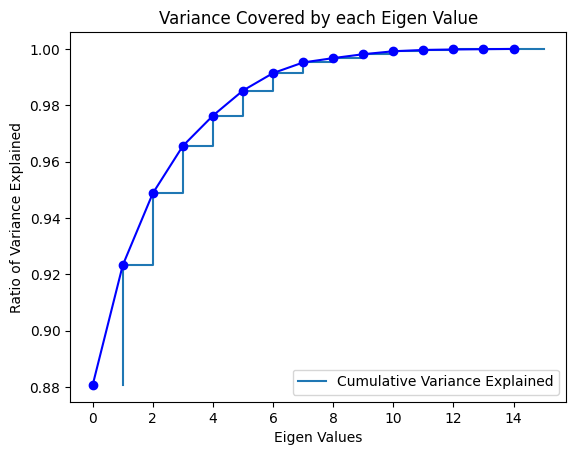

In [ ]:
#Visualize Variance Explained by Each Eigenvalue
plt.step(list(range(1, 16)), np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance Explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.legend()
plt.show()

In [ ]:
pca_data = pca_data.drop(columns=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

pca_data.head()

,0,1,2
0,0.198265,0.738514,0.010319
1,-0.199239,0.000079,-0.004807
2,-0.080636,0.006763,-0.016558
3,-0.151696,-0.023416,-0.018004
4,-0.164470,-0.015664,-0.013211


So now we have two datasets:
1. Feature combination : Light Motors, Buses, Taxis, Other_vehicles
2. PCA Data

# **Modelling**

**Feature Combination and PCA Data Preparation**

In [ ]:
m1 = feature_data.drop(columns=['States/Union Territories']).values

m2 = pca_data.values

Evaluating number of cluster selection using Elbow method and Silhouette score

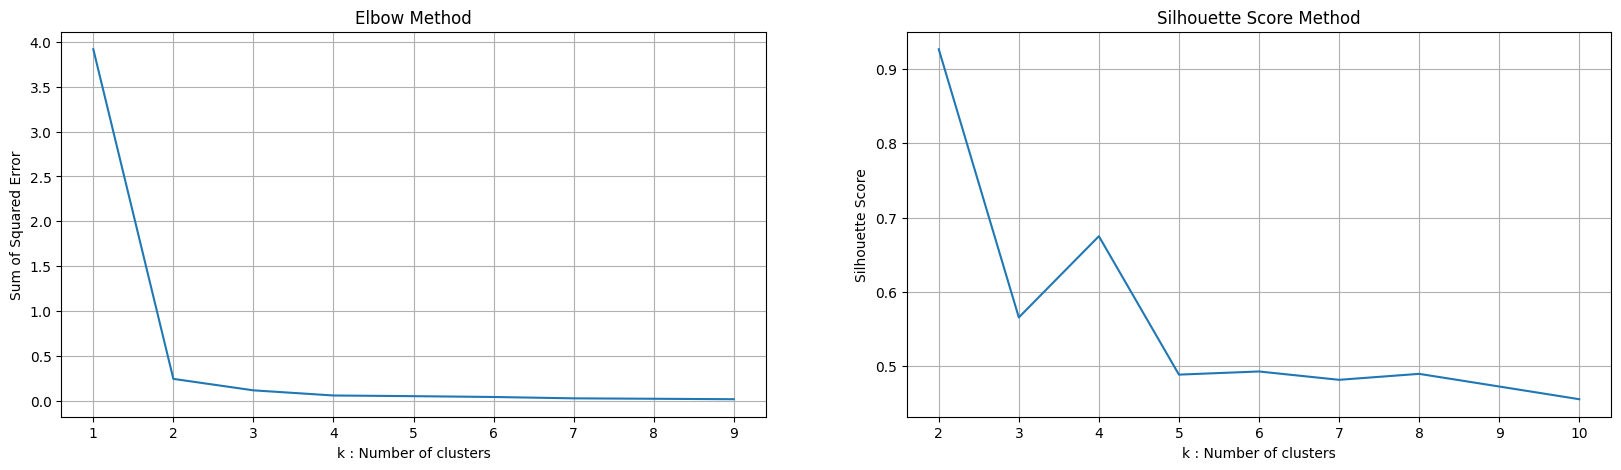

In [ ]:
sse = {}
sil = []
kmax = 10 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init='auto').fit(m1)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric='euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


n_clusters = 3

# **K-MEANS ALGORITHM**

**Feature data K-Means Vizualization**

**Fit KMeans Model and Visualize Clusters**

1. Light Motors-Buses-Taxis

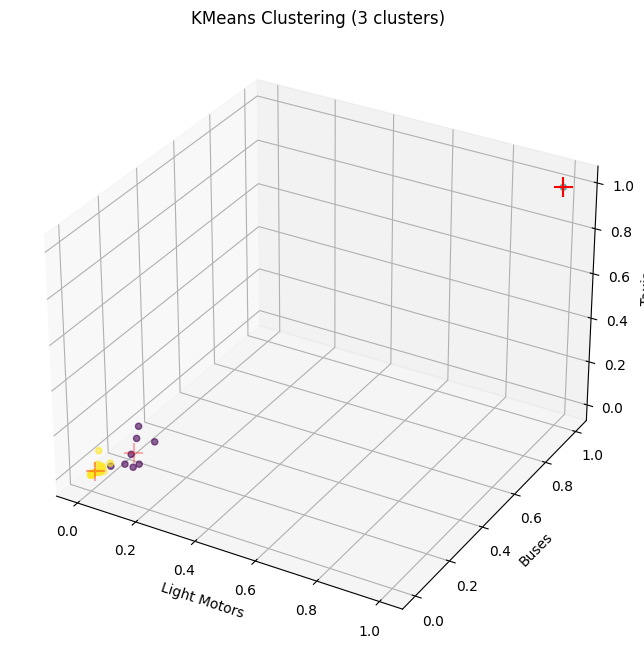

In [ ]:
model = KMeans(n_clusters=3, max_iter=1000, n_init='auto')

model.fit(m1)

# Get centroids and labels
centroids = model.cluster_centers_
labels = model.labels_

# Visualize clusters in 3D using the original feature data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(m1[:, 0], m1[:, 1], m1[:, 2], c=labels, cmap='viridis', marker='o', alpha=0.6)

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='+', s=200)

# Set labels and title
ax.set_xlabel('Light Motors')
ax.set_ylabel('Buses')
ax.set_zlabel('Taxis')
ax.set_title('KMeans Clustering (3 clusters)')

plt.show()

2. Light Motors-Buses-Other Vehicles

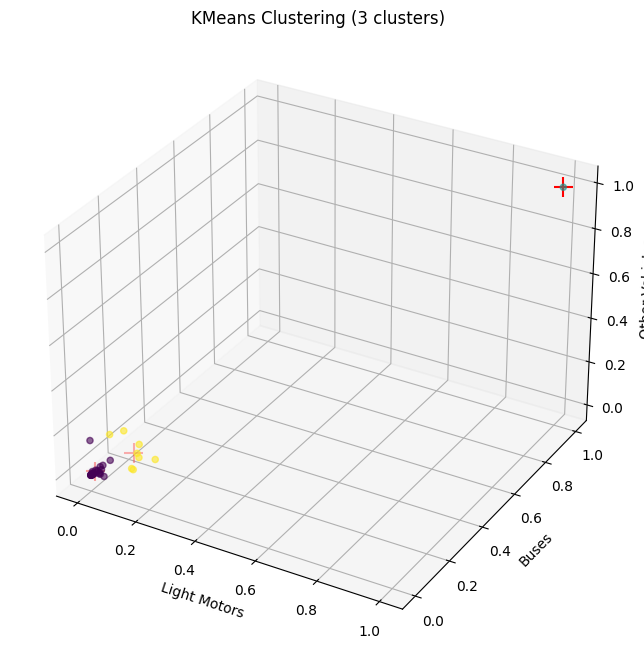

In [ ]:
model = KMeans(n_clusters=3, max_iter=1000, n_init='auto')

# Fit KMeans model on the feature data
model.fit(m1)

# Get centroids and labels
centroids = model.cluster_centers_
labels = model.labels_

# Visualize clusters in 3D using the original feature data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(m1[:, 0], m1[:, 1], m1[:, 3], c=labels, cmap='viridis', marker='o', alpha=0.6)

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='+', s=200)

# Set labels and title
ax.set_xlabel('Light Motors')
ax.set_ylabel('Buses')
ax.set_zlabel('Other Vehicles')
ax.set_title('KMeans Clustering (3 clusters)')

plt.show()

3. Buses-Taxis-Other Vehicles

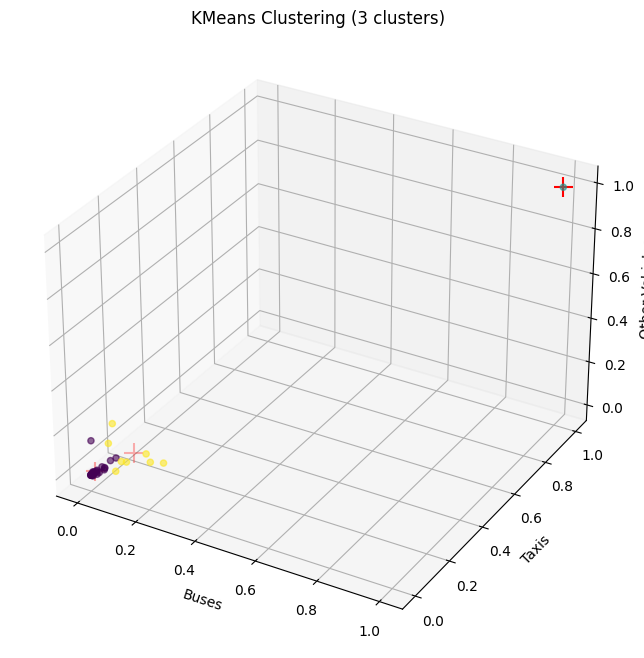

In [ ]:
model = KMeans(n_clusters=3, max_iter=1000, n_init='auto')

# Fit KMeans model on the feature data
model.fit(m1)

# Get centroids and labels
centroids = model.cluster_centers_
labels = model.labels_

# Visualize clusters in 3D using the original feature data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(m1[:, 1], m1[:, 2], m1[:, 3], c=labels, cmap='viridis', marker='o', alpha=0.6)

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='+', s=200)

# Set labels and title
ax.set_xlabel('Buses')
ax.set_ylabel('Taxis')
ax.set_zlabel('Other Vehicles')
ax.set_title('KMeans Clustering (3 clusters)')

plt.show()

**PCA K-Means Vizualizations**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


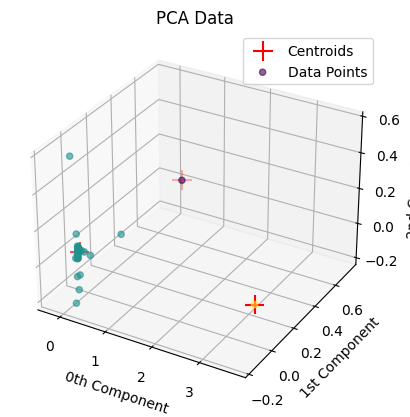

In [ ]:

# Fit KMeans on the PCA-transformed data
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m2)
centroids = model.cluster_centers_
labels = model.labels_

# Visualize clusters in 3D using the PCA-transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='+', s=200, label='Centroids')

# Plot data points
ax.scatter(m2[:, 0], m2[:, 1], m2[:, 2], c=labels, cmap='viridis', marker='o', alpha=0.6, label='Data Points')

ax.set_title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.legend()

plt.show()


# **HIERARCHIAL CLUSTERING/ AGGLOMERATIVE CLUSTERING**

**1. Feature Data**

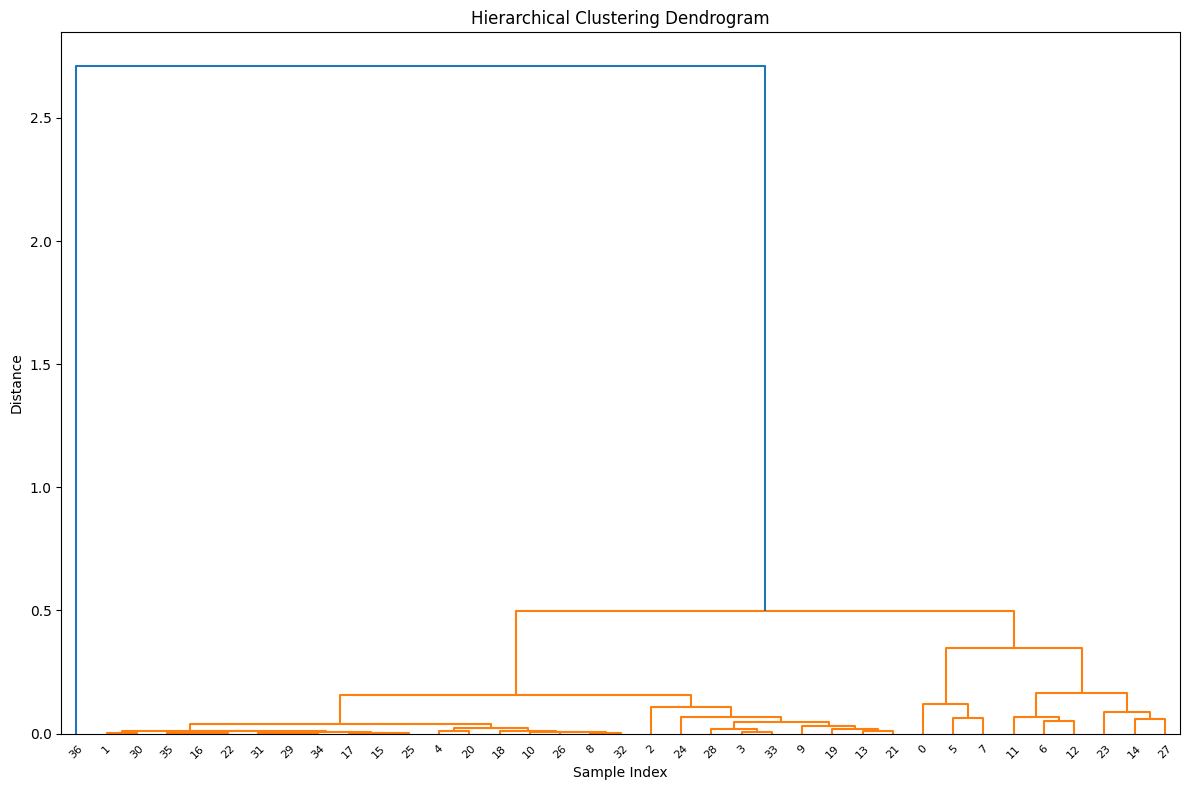

In [ ]:
# Compute linkage matrix using Ward's method and Euclidean distance
linkage_data = linkage(m1, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

n_clusters = 2

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

# Fit the model and get cluster labels
labels = hierarchical_cluster.fit(m1)

# Assign cluster labels to original data
pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; feature_data['Class'] = pred_agc

1. Light Motors - Buses - Taxis

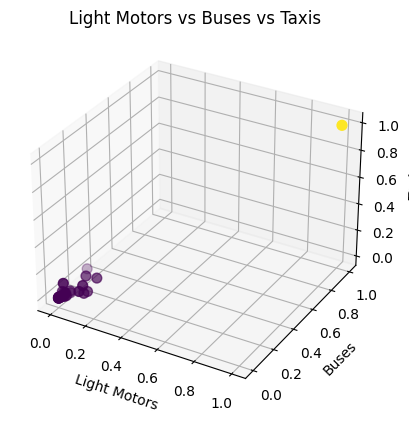

In [ ]:
# Visualize clusters in 3D using Light Motors, Buses, and Taxis features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract feature data
x = np.array(feature_data['Light Motors'])
y = np.array(feature_data['Buses'])
z = np.array(feature_data['Taxis'])

# Scatter plot with cluster labels
ax.scatter(x, y, z, c=feature_data['Class'], s=50)

ax.set_title('Light Motors vs Buses vs Taxis')
ax.set_xlabel('Light Motors')
ax.set_ylabel('Buses')
ax.set_zlabel('Taxis')

plt.show()

2. Light Motors - Buses - Other Vehicles

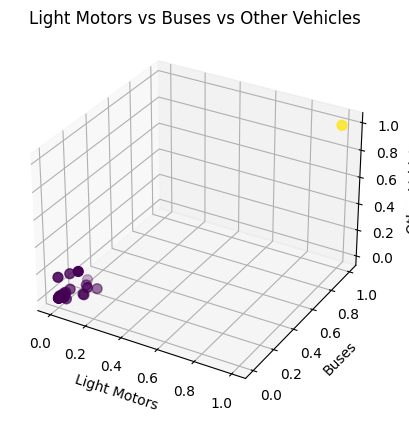

In [ ]:
# Visualize clusters in 3D using Light Motors, Buses, and Other Vehicles features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract feature data
x = np.array(feature_data['Light Motors'])
y = np.array(feature_data['Buses'])
z = np.array(feature_data['Other_vehicles'])

# Scatter plot with cluster labels
ax.scatter(x, y, z, c=feature_data['Class'], s=50)

ax.set_title('Light Motors vs Buses vs Other Vehicles')
ax.set_xlabel('Light Motors')
ax.set_ylabel('Buses')
ax.set_zlabel('Other Vehicles')

plt.show()

3. Buses - Taxis - Other Vehicles

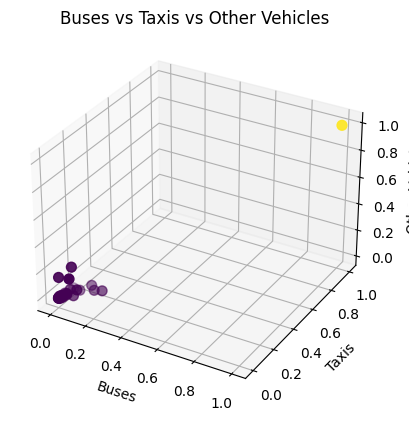

In [ ]:
# Visualize clusters in 3D using Buses, Taxis, and Other Vehicles features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract feature data
x = np.array(feature_data['Buses'])
y = np.array(feature_data['Taxis'])
z = np.array(feature_data['Other_vehicles'])

# Scatter plot with cluster labels
ax.scatter(x, y, z, c=feature_data['Class'], s=50)

ax.set_title('Buses vs Taxis vs Other Vehicles')
ax.set_xlabel('Buses')
ax.set_ylabel('Taxis')
ax.set_zlabel('Other Vehicles')

plt.show()


**2. PCA Data**

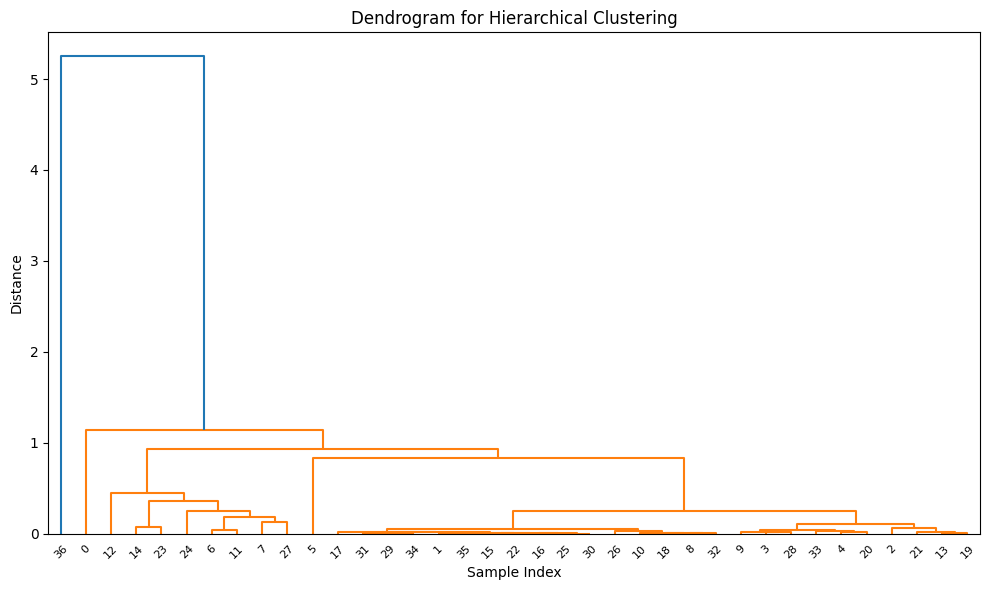

In [ ]:
# Perform hierarchical clustering on PCA-transformed data
linkage_data = linkage(m2, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_data)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [ ]:
# Perform Agglomerative Clustering on PCA-transformed data
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit(m2)

# Assign cluster labels to original data and PCA data
pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc
pca_data['Class'] = pred_agc


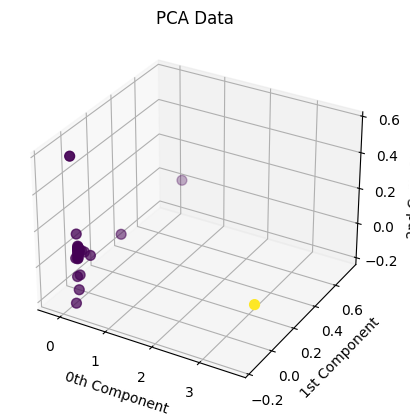

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract PCA components
x = np.array(pca_data[0])
y = np.array(pca_data[1])
z = np.array(pca_data[2])

# Plot data points with cluster labels
ax.scatter(x, y, z, c=pca_data['Class'], s=50)

ax.set_title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')

plt.show()


# Cluster Analysis and Marketing Campaign Strategies

## **Cluster Analysis**

### Cluster 1 (Purple)
- **Description**: This cluster represents areas with a high density of light motors and taxis, but relatively fewer buses.
  
### Cluster 2 (Yellow)
- **Description**: This cluster is characterized by a balanced presence of light motors, buses, and taxis, with moderate levels of each.

### Cluster 3 (Green)
- **Description**: This cluster indicates areas where there is a significant presence of buses, but relatively fewer light motors and taxis.

## **Marketing Campaign Strategies**

### Cluster 1 (Red)

- **Target Audience**: Urban areas with high population density.
- **Campaign Focus**: Promote taxi services and compact light motors, ideal for navigating through congested city streets.
- **Marketing Channels**:
  - Social media advertising targeting urban commuters
  - Partnerships with ride-sharing apps
  - Billboard advertisements in high-traffic areas

### Cluster 2 (Green)

- **Target Audience**: Areas with a mix of urban and suburban populations.
- **Campaign Focus**: Emphasize the versatility of light motors, buses, and taxis to cater to diverse transportation needs.
- **Marketing Channels**:
  - Local newspaper ads
  - Community event sponsorships
  - Targeted email campaigns to businesses and residents

### Cluster 3 (Blue)

- **Target Audience**: Suburban or rural areas with a reliance on public transportation.
- **Campaign Focus**: Highlight the convenience and affordability of bus services for commuting and leisure travel.
- **Marketing Channels**:
  - Radio advertisements during peak commuting hours
  - Partnerships with local tour operators for sightseeing packages
  - Bus stop signage and promotions

## Implementation and Evaluation

1. **Deploy Tailored Marketing Campaigns**: 
   - Execute the marketing strategies in each cluster region based on the characteristics identified in the cluster analysis.

2. **Monitor Campaign Performance**:
   - Track key metrics such as website visits, app downloads (if applicable), customer feedback, and sales data.

3. **Collect Qualitative Insights**:
   - Conduct surveys or focus groups to gather feedback from target audiences.

4. **Adjust Marketing Strategies**:
   - Analyze the feedback and performance data to refine and optimize the campaigns for improved effectiveness.
